In [65]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d, CubicSpline
import os
import matplotlib.pyplot as plt

In [229]:
def calculate_soc(max_capacity_ah, current_values, time_intervals):
    # Ensure there are at least two data points for trapezoidal integration
    if len(current_values) < 2 or len(time_intervals) < 1:
        raise ValueError("Insufficient data points for trapezoidal integration")

    # Calculate charge added using trapezoidal rule
    charge_added_ah = 0
    for i in range(1, len(current_values)):
        average_current = (current_values[i - 1] + current_values[i])/2 
        charge_added_ah += average_current * time_intervals[i - 1]  # ΔT is time_intervals[i-1]

    # Update the value
    x_new = (charge_added_ah / max_capacity_ah)

    return x_new

In [138]:
def calculate_soc_discharged(max_capacity_ah, current_values, time_intervals):
    # Ensure there are at least two data points for trapezoidal integration
    if len(current_values) < 2 or len(time_intervals) < 1:
        raise ValueError("Insufficient data points for trapezoidal integration")

    # Calculate charge added using trapezoidal rule
    charge_added_ah = 0
    for i in range(1, len(current_values)):
        average_current = (current_values[i - 1] + current_values[i])/2 
        charge_added_ah += average_current * time_intervals[i - 1]  # ΔT is time_intervals[i-1]

    # Update the value
    x_new = (charge_added_ah / max_capacity_ah)

    return x_new

In [139]:
file_path = r"S:\インターンシップ\Intern Projects\INDONESIA_Porjects\2024\Fikri Abdul Aziz\Battery Reseach\Battery Data\Battery Data_All.xlsx"  
sheet_name = '10 Ampere Discharging'  

# Read the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

measured_voltage=data['Voltage_24102024 (mV)'].values/1000
# measured_voltage_flipped = (data['Voltage_24102024 (mV)'].max()-(data['Voltage_24102024 (mV)']-data['Voltage_24102024 (mV)'].min())).values/1000 # Adjust column name if different
Time = data['Time (s)'].values
data

,Time (s),Voltage_16102024 (mV),Voltage_24102024 (mV),Voltage_28102024 (mV),Voltage_30102024 (mV),Current_24102024 (mA),Current_28102024 (mA),Current_30102024 (mA),Capacity_16102024 (Ah),Capacity_24102024 (Ah),Capacity_28102024 (Ah),Capacity_30102024 (Ah),SoC_16102024 (%),SoC_24102024(%),SoC_28102024(%),SoC_30102024(%)
0,0,3410.0,4190,3900.0,3930.0,10000,10000.0,10000.0,20.258333,69.608333,49.150000,45.783333,17.991415,61.819124,43.650089,40.660154
1,3,3410.0,4190,3900.0,3930.0,10000,10000.0,10000.0,20.250000,69.600000,49.141667,45.775000,17.984014,61.811723,43.642688,40.652753
2,6,3410.0,4190,3900.0,3930.0,10000,10000.0,10000.0,20.241667,69.591667,49.133333,45.766667,17.976613,61.804322,43.635287,40.645352
3,9,3410.0,4190,3900.0,3930.0,10000,10000.0,10000.0,20.233333,69.583333,49.125000,45.758333,17.969213,61.796921,43.627886,40.637951
4,12,3410.0,4190,3900.0,3930.0,10000,10000.0,10000.0,20.225000,69.575000,49.116667,45.750000,17.961812,61.789520,43.620485,40.630551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,25047,NaN,2500,NaN,NaN,10000,NaN,NaN,NaN,0.033333,NaN,NaN,NaN,0.029603,NaN,NaN
8350,25050,NaN,2500,NaN,NaN,10000,NaN,NaN,NaN,0.025000,NaN,NaN,NaN,0.022202,NaN,NaN
8351,25053,NaN,2500,NaN,NaN,10000,NaN,NaN,NaN,0.016667,NaN,NaN,NaN,0.014802,NaN,NaN
8352,25056,NaN,2500,NaN,NaN,10000,NaN,NaN,NaN,0.008333,NaN,NaN,NaN,0.007401,NaN,NaN


In [192]:
# Define a consistent time step for each interval in seconds 
time_step_seconds = 3
time_intervals_hours = time_step_seconds / 3600  # Convert seconds to hours

# Create a list of time intervals (same value for each step)
time_intervals = [time_intervals_hours] * (len(data) - 1)

# Estimate the initial SoC based on the first voltage measurement
initial_soc = 1

# Extract data for calculations
current_values = data['Current_24102024 (mA)'].values/1000


In [198]:
# Add SoC result to the DataFrame
data['SoC (%)'] = [initial_soc * 100] + [None] * (len(data) - 1)  # Fill initial SoC
for i in range(1, len(data)):
    x =  calculate_soc_discharged(max_capacity_ah=69.6083, current_values=current_values[:i+1], time_intervals=time_intervals[:i])
    data.loc[i, 'SoC (%)'] = max(0.0, min((initial_soc-x)*100, 100))


In [199]:
SOC = data['SoC (%)'].values
SOC

array([1.00000000e+02, 9.99880282e+01, 9.99760565e+01, ...,
       2.38956178e-02, 1.19238654e-02, 0.00000000e+00])

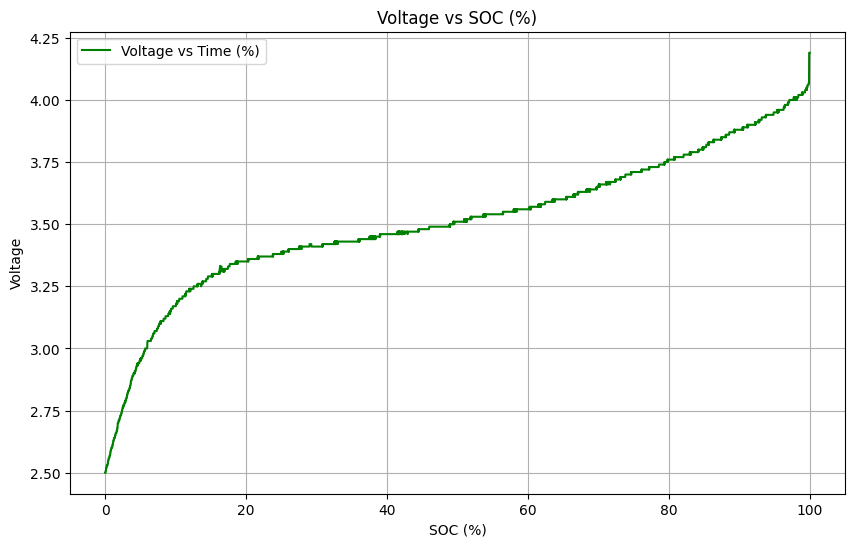

In [200]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(SOC,measured_voltage, label='Voltage vs Time (%)', color='g')
plt.xlabel('SOC (%)')
plt.ylabel('Voltage')
plt.title('Voltage vs SOC (%)')
plt.legend()
plt.grid(True)
plt.show()

In [214]:
# Create an interpolation function for SOC based on OCV
soc_from_TV = interp1d(measured_voltage, SOC, kind='linear', fill_value="extrapolate")

In [224]:
def estimate_initial_soc_from_ocv(voltage):
    # Predict SoC using interpolation function
    estimated_soc_percentage = soc_from_TV(voltage)/100
    return estimated_soc_percentage   # Convert to fraction

C:\Users\SYOHIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\SYOHIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


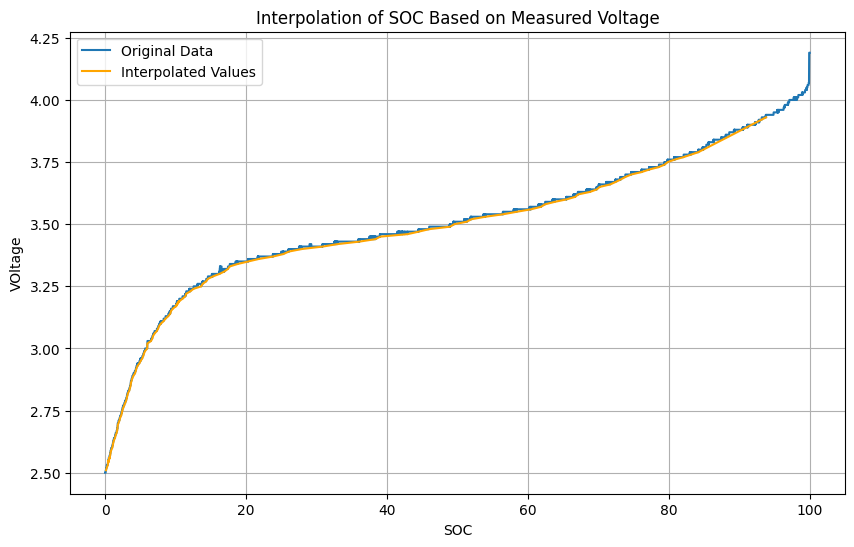

In [208]:
# Generate some test values to see how the function interpolates/extrapolates
test_voltages = data['Voltage_30102024 (mV)'].values/1000 # Values to test the interpolation (including extrapolation range)
interpolated_soc = soc_from_TV(test_voltages)


interpolated_soc
# Plot the results for visualization
plt.figure(figsize=(10, 6))
plt.plot(SOC, measured_voltage, '-', label='Original Data', markersize=8)
plt.plot(interpolated_soc,  test_voltages, '-', label='Interpolated Values', color='orange')
plt.xlabel('SOC')
plt.ylabel('VOltage')
plt.title('Interpolation of SOC Based on Measured Voltage')
plt.legend()
plt.grid(True)
plt.show()

In [379]:
sheet_name_1 = '10 Ampere Charging'  

# Read the Excel file
data_1 = pd.read_excel(file_path, sheet_name=sheet_name_1)
Time_2 = data_1['Time (s)'].values
len(Time_2)

10075

In [205]:
data_1

,Time (s),Voltage_21102024 (mV),Voltage_25102024 (mV),Voltage_29102024 (mV),Current_21102024 (mA),Current_25102024 (mA),Current_29102024 (mA)
0,0,2520,3360.0,3000.0,10010,20.0,20.0
1,3,2520,3700.0,3400.0,10010,10010.0,10010.0
2,6,2530,3720.0,3420.0,10010,10010.0,10010.0
3,9,2540,3720.0,3420.0,10010,10010.0,10010.0
4,12,2550,3700.0,3420.0,10010,10010.0,10010.0
...,...,...,...,...,...,...,...
10070,30210,4210,NaN,NaN,7610,NaN,NaN
10071,30213,4210,NaN,NaN,7450,NaN,NaN
10072,30216,4210,NaN,NaN,7580,NaN,NaN
10073,30219,4210,NaN,NaN,7590,NaN,NaN


In [231]:
# Define a consistent time step for each interval in seconds 
time_step_seconds = 3
time_intervals_hours = time_step_seconds / 3600  # Convert seconds to hours

# Create a list of time intervals (same value for each step)
time_intervals_1 = [time_intervals_hours] * (len(data_1) - 1)

# Estimate the initial SoC based on the first voltage measurement
initial_voltage_1 = data_1['Voltage_21102024 (mV)'].iloc[0]/1000
initial_soc_1= estimate_initial_soc_from_ocv(initial_voltage_1)

# Extract data for calculations
current_values_1 = data_1['Current_21102024 (mA)'].values/1000

In [246]:
# Add SoC result to the DataFrame
data_1['Estimated SoC (%)'] = [initial_soc_1 * 100] + [None] * (len(data_1) - 1)  # Fill initial SoC
for i in range(1, len(data_1)):
    x_2 = calculate_soc(max_capacity_ah=112.6, current_values=current_values_1[:i+1], time_intervals=time_intervals_1[:i])
    data_1.loc[i, 'Estimated SoC (%)'] = max(0.0, min((initial_soc_1+x_2)*100, 100))



In [377]:
SOC_1 = data_1['Estimated SoC (%)']
data_1


,Time (s),Voltage_21102024 (mV),Voltage_25102024 (mV),Voltage_29102024 (mV),Current_21102024 (mA),Current_25102024 (mA),Current_29102024 (mA),Estimated SoC (%)
0,0,2520,3360.0,3000.0,10010,20.0,20.0,0.227415
1,3,2520,3700.0,3400.0,10010,10010.0,10010.0,0.234824
2,6,2530,3720.0,3420.0,10010,10010.0,10010.0,0.242232
3,9,2540,3720.0,3420.0,10010,10010.0,10010.0,0.249640
4,12,2550,3700.0,3420.0,10010,10010.0,10010.0,0.257048
...,...,...,...,...,...,...,...,...
10070,30210,4210,NaN,NaN,7610,NaN,NaN,74.440478
10071,30213,4210,NaN,NaN,7450,NaN,NaN,74.446051
10072,30216,4210,NaN,NaN,7580,NaN,NaN,74.451612
10073,30219,4210,NaN,NaN,7590,NaN,NaN,74.457226


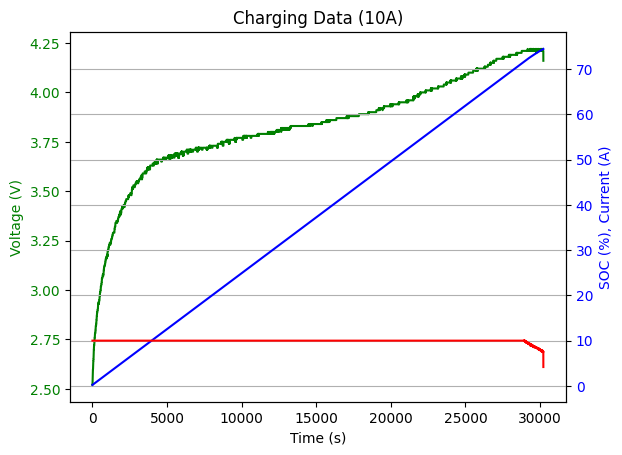

In [376]:
fig, ax1 = plt.subplots()
# plot measured voltage vs time
ax1.plot(data_1['Time (s)'], data_1['Voltage_21102024 (mV)'].values/1000, 'g-')  # 'g-' specifies a green line
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Plot Estimated SoC vs. Time
ax2 = ax1.twinx() 
ax2.plot(data_1['Time (s)'], data_1['Estimated SoC (%)'], 'b-')  # 'b-' specifies a blue line
ax2.plot(data_1['Time (s)'], current_values_1, 'r-')
ax2.set_ylabel('SOC (%), Current (A)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Charging Data (10A)')
plt.grid(True)
plt.show()

In [322]:
sheet_name_2 = '20 Ampere Charging'  # Change this to the name of your sheet if it's different

# Read the Excel file
data_2 = pd.read_excel(file_path, sheet_name=sheet_name_2)
data_2

,Time (s),Voltage_02102024 (mV),Voltage_07102024 (mV),Voltage_09102024 (mV),Current_02102024 (mA),Current_07102024 (mA),Current_09102024 (mA)
0,0,3760.0,3220.0,3630,20.0,20.0,20
1,3,4010.0,3470.0,3890,20400.0,20400.0,20400
2,6,4010.0,3470.0,3890,20400.0,20400.0,20400
3,9,4010.0,3470.0,3890,20400.0,20400.0,20400
4,12,4010.0,3480.0,3900,20400.0,20400.0,20400
...,...,...,...,...,...,...,...
8861,26583,NaN,NaN,4200,NaN,NaN,3370
8862,26586,NaN,NaN,4200,NaN,NaN,3410
8863,26589,NaN,NaN,4200,NaN,NaN,3250
8864,26592,NaN,NaN,4200,NaN,NaN,3270


In [406]:
#cleaning data
voltage_2 = data_2['Voltage_07102024 (mV)']
current_2 = data_2['Current_07102024 (mA)']

voltage_2_cleaned = voltage_2.dropna()/1000
current_2_cleaned = current_2.dropna()

Time_2 = data_2['Time (s)'].iloc[:len(voltage_2_cleaned)]
voltage_2_cleaned

0       3.22
1       3.47
2       3.47
3       3.47
4       3.48
        ... 
7379    4.20
7380    4.20
7381    4.20
7382    4.20
7383    4.20
Name: Voltage_07102024 (mV), Length: 7384, dtype: float64

In [392]:
# Define a consistent time step for each interval in seconds 
time_step_seconds = 3
time_intervals_hours = time_step_seconds / 3600  # Convert seconds to hours

# Create a list of time intervals (same value for each step)
time_intervals_2 = [time_intervals_hours] * (len(voltage_2) - 1)
# Estimate the initial SoC based on the first voltage measurement
initial_voltage_2 = voltage_2_cleaned.iloc[0]/1000
initial_soc_2 = estimate_initial_soc_from_ocv(initial_voltage_2)

# Extract data for calculations
current_values_2 = current_2_cleaned/1000
current_values_2



0        0.02
1       20.40
2       20.40
3       20.40
4       20.40
        ...  
7379     3.64
7380     3.66
7381     3.67
7382     3.58
7383     3.69
Name: Current_07102024 (mA), Length: 7384, dtype: float64

In [402]:
SOC_xx = [initial_soc_2 * 100] + [None] * (len(data_2) - 1) 
SOC_2 = pd.Series(SOC_xx, name='SOC')
SOC_2

0       11.504806
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
8861          NaN
8862          NaN
8863          NaN
8864          NaN
8865          NaN
Name: SOC, Length: 8866, dtype: float64

In [405]:
# Add SoC result to the DataFrame
SOC_2 = pd.Series([initial_soc_2 * 100] + [None] * (len(current_values_2) - 1), name ='Estimated SoC (%)')
for i in range(1, len(current_2_cleaned)):
    x_3 = calculate_soc(max_capacity_ah=112.6, current_values=current_values_2[:i+1], time_intervals=time_intervals_2[:i])
    SOC_2.loc[i] = max(0,min((initial_soc_2+x_3)*100,100))


In [407]:
SOC_2

0       11.504806
1       11.512362
2       11.527460
3       11.542558
4       11.557655
          ...    
7379    99.025425
7380    99.028126
7381    99.030839
7382    99.033521
7383    99.036212
Name: Estimated SoC (%), Length: 7384, dtype: float64

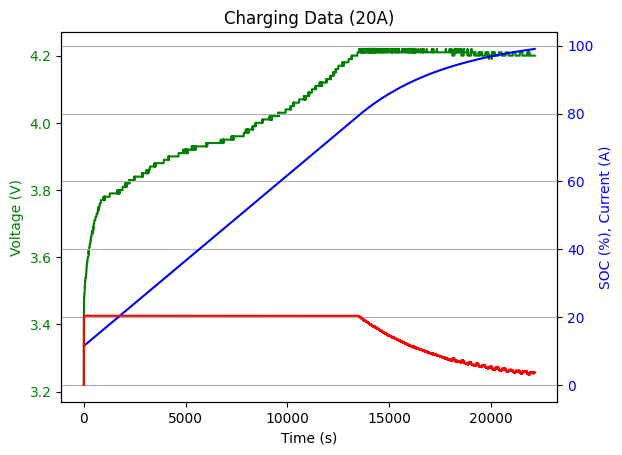

In [408]:
# # Plot Estimated SoC vs. Time
# plt.figure(figsize=(10, 6))
# plt.plot(data_2['Time (s)'], data_2['Estimated SoC (%)'], linestyle='-', color='b')
# plt.title('Estimated SoC vs. Time')
# plt.xlabel('Time (hours)')
# plt.ylabel('Estimated SoC (%)')
# plt.grid(True)
# plt.show()

fig, ax1 = plt.subplots()
# plot measured voltage vs time
ax1.plot(Time_2,voltage_2_cleaned, 'g-')  # 'g-' specifies a green line
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Plot Estimated SoC vs. Time
ax2 = ax1.twinx() 
ax2.plot(Time_2, SOC_2, 'b-')  # 'b-' specifies a blue line
ax2.plot(Time_2, current_values_2, 'r-')
ax2.set_ylabel('SOC (%), Current (A)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Charging Data (20A)')
plt.grid(True)
plt.show()